<a href="https://colab.research.google.com/github/jgracie52/CAP4630/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Code Prep

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


##Preprocess dataset

In [0]:
train_images = train_images.reshape((50000, 32, 32, 3)) /255.0
test_images = test_images.reshape((10000, 32, 32, 3)) /255.0

#General Concepts

##Artificial Intelligence

Artificial intelligence is a branch of computer science that focuses on creating "intelligent" systems. What that means depends on the task it is being built for. Some scientists build systems to think as humans do ("strong" AI), others look to build systems that don't think as humans do, but can operate with minimal human interaction for useful tasks ("weak" AI).
Overall the goal of AI is to use human intelligence as a model for algorithms, though not necessarily the end goal.

##Machine Learning and Deep Learning

Machine learning is a specific branch of AI that deals with creating systems that automatically "learn" and improve without being hardcoded.
Some branches of Machine learning include: Supervised learning, unsupervised learning, and reinforcement learning
Deep learning is a section of machine learning that is built around "Deep" neural networks. The idea is build a model that include many layers of interconnected neurons to get an accurate prediction of the chosen data. 
Deep learning can be supervised, unsupervised or semi-supervised, and has many forms including Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), and Long Short Term Memory (LSTMs)

#Building a Model

Every Deep Learning Algorithm has a unique set of components that allow it to do learn in different ways. For instance, in a convolutional network, there is an input tensor that of size [number of images] X [image height] X [image width] X [image depth]. The convent also includes a kernal whose width and height are hyperparameters of the model (parameters that can be changed to improve accuracy).
<br><br>Each layer of the convnet convolves the input and then passes it to the next layer. Some CNNs will use pooling to reduce the dimensions of the data thereby streamlining the computation.
<br><br>Each layer is built from neurons that have weights attached to them. The layers are vectors of weights and a bias term similar to statistical regression. The vectors in a CNN are called filters and represent features of the input. In a CNN several neurons can share the same filter.

Example of a CNN built with Keras:

In [28]:
# set up the layers

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), #convolutional layer
    keras.layers.MaxPooling2D((2, 2)), #pooling to reduce dimensions
    #
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'), #dense layer
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

model.compile(optimizer='adam', #optimizer
             loss='sparse_categorical_crossentropy', #loss function
             metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                230432    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 231,658
Trainable params: 231,658
Non-trainable params: 0
_________________________________________________________________


#Comping a Model

With deep learning, you can imrove the accuracy of a model by changing a few hyperperameters, such as optimizers, learning rate, activation functions, batch size, number of epochs, etc.
<br><br>Optimizers are algorithms/methods that help change the attributes of a neural network in order to reduce losses. Some optimizers include Gradient Descent, Stochastic Gradient Descent, and Adam (Adaptive Moment Estimation)
<br><br>The Learning Rate controls how much the weights of neurons change with respect to a neural network. The lower the learning rate, the slower the model travels down the slope (the slower it learns). The higher the learning rate the faster the model travels down the slope.
<br><br>Activation functions allow for a network to have non-linear properties by activating or deactivating a neuron based on a certain threshold. Allowing for non-linearity gives the network the ability to understand more complex data (since not all data will have linear relationships). Some activation functions include Sigmoid, tanh, and ReLu (Rectified Linear Units).
<br><br>The Batch Size is the number of training examples per iteration. Increasing this value will increase the number of examples, but will also decrease performance due to higher computation.
<br><br>An Epoch is when an entire dataset is passed forward and backward through a network ONCE. The number of Epochs determines how many times this happens. Increasing the amount of epochs allows the model to train on the data more and more, however there comes a point where it trains on the training data to the point that it memorizes it and doesn't learn how to predict other similar data not in the training set.
<br><br>Putting these all together allows us to create more accurate models by better fitting the model to the data.

An example of different hyper parameters:

In [0]:
#hyper parameters
epochs = 10
keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False) #changing learning rate for Adam optimizer
batch = 64 

#Training a Model

An example of training a model using the CIFAR10 dataset

###Training the Model
####(from above code cells)

In [30]:
history = model.fit(train_images, 
                      train_labels, 
                      batch_size = batch,
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 32s 635us/sample - loss: 1.5508 - acc: 0.4474 - val_loss: 1.3245 - val_acc: 0.5329
Epoch 2/10
50000/50000 [==============================] - 31s 622us/sample - loss: 1.2513 - acc: 0.5610 - val_loss: 1.2189 - val_acc: 0.5699
Epoch 3/10
50000/50000 [==============================] - 31s 620us/sample - loss: 1.1474 - acc: 0.5991 - val_loss: 1.1566 - val_acc: 0.5943
Epoch 4/10
50000/50000 [==============================] - 31s 617us/sample - loss: 1.0693 - acc: 0.6276 - val_loss: 1.1320 - val_acc: 0.5993
Epoch 5/10
50000/50000 [==============================] - 31s 619us/sample - loss: 1.0168 - acc: 0.6450 - val_loss: 1.1537 - val_acc: 0.5968
Epoch 6/10
50000/50000 [==============================] - 31s 621us/sample - loss: 0.9725 - acc: 0.6623 - val_loss: 1.0701 - val_acc: 0.6282
Epoch 7/10
50000/50000 [==============================] - 32s 632us/sample - loss: 0.9274 - acc: 0.6779 

###Loss

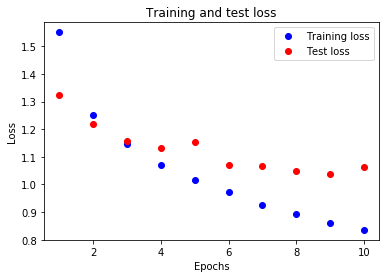

In [31]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Accuracy

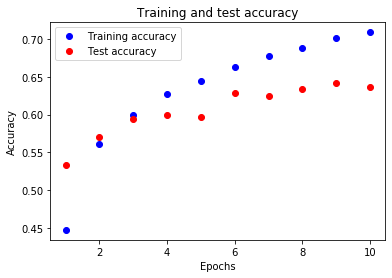

In [32]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Underfitted Models

Sometimes a model can be underfitted, i.e. the model does not represent the data very well and has a low accuracy.
<br><br>An example of an underfitted model is shown below

###Model

In [35]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), #convolutional layer
    keras.layers.Dropout(0.5),
    keras.layers.MaxPooling2D((2, 2)), #pooling to reduce dimensions
    #
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'), #dense layer
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

model.compile(optimizer='adam', #optimizer
             loss='sparse_categorical_crossentropy', #loss function
             metrics=['accuracy'])

epochs = 10
keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False) #changing learning rate for Adam optimizer
batch = 32

history = model.fit(train_images, 
                      train_labels, 
                      batch_size = batch,
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 7200)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                230432    
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

###Loss

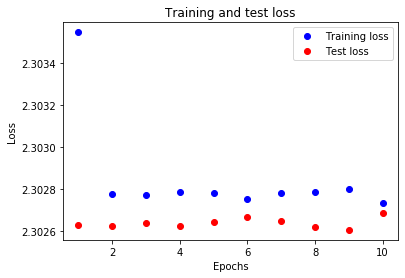

In [36]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Accuracy

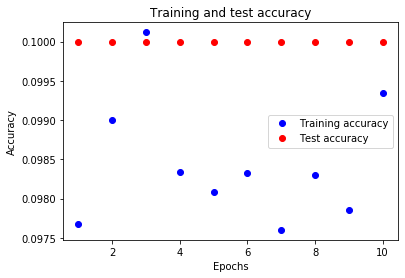

In [37]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Overfitted Model

A model may also be overfitted, where the model is trained to the point that it memorizes the data being received and doesn't learn how to predict new data. This can be seen in the high level of accuracy of the training set and relatively low accuracy of the test set
<br><br>An example of an overfitted model is show below:

###Model:

In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(128, (3, 3), activation='elu', input_shape=(32, 32, 3)), #convolutional layer
    keras.layers.MaxPooling2D((2, 2)), #pooling to reduce dimensions
    #
    keras.layers.Conv2D(64, (3, 3), activation='elu', input_shape=(32, 32, 3)), #convolutional layer
    keras.layers.MaxPooling2D((2, 2)), #pooling to reduce dimensions
    #
    keras.layers.Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 3)), #convolutional layer
    keras.layers.MaxPooling2D((2, 2)), #pooling to reduce dimensions
    #
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'), #dense layer
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

model.compile(optimizer='adam', #optimizer
             loss='sparse_categorical_crossentropy', #loss function
             metrics=['accuracy'])

epochs = 15
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) #changing learning rate for Adam optimizer
batch = 32

history = model.fit(train_images, 
                      train_labels, 
                      batch_size = batch,
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________

###Loss

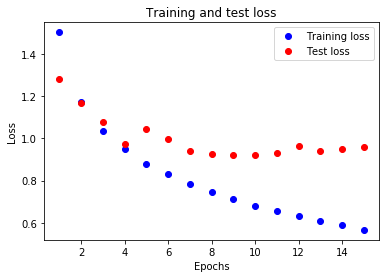

In [6]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Accuracy

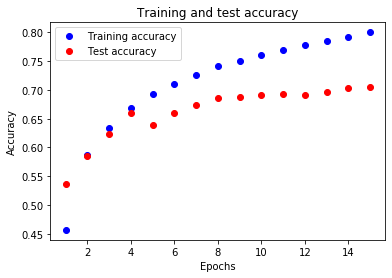

In [7]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Finetuning a Pretrained Model

When finetuning a pretrained model, the first thing I would do is replace the softmax layer of the model with a custome softmax layer that better fits the data I'm using the model for.
<br><br>Next, I would use a smaller learning rate than for networks I build from scratch. The above models were set to a relatively high learning rate of 0.001 (or similar) however for a pretrained model I would use something more like 0.0001 (or similar). The reason for this is that I wouldn't want to change the weights of the pretrained model to quickly since the whole point of using that model is to have good preset weights. Setting the learning rate to high would cause those values to change to quickly, thereby nullifying one of the better parts of using a pretrained model.
<br><br>From there I would freeze the weights of the first few layers since those layers usually capture universal features such as curves and edges with already good weights attached to them.
<br><br>Finally, I would begin changing the hyperparameters, such as batch size, epochs, dropout, and learning rate (if needed) to slowly bring the model accuracy of both the train and test sets higher and higher.